In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2021-07-18 20:46:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.253.62.128, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  97.5MB/s    in 0.7s    

2021-07-18 20:46:43 (97.5 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip -q cats_and_dogs_filtered.zip

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
from tensorflow.keras import Input,Model
import numpy as np

In [ ]:
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"
BATCH_SIZE = 4
trdata = ImageDataGenerator(zoom_range=0.1, shear_range=0.2)
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224), shuffle=True)
tsdata = ImageDataGenerator(zoom_range=0.1, shear_range=0.2)
testdata = tsdata.flow_from_directory(directory=validation_dir, target_size=(224,224), shuffle=True)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Reescribir la red utilizando el método funcional y definiendo una función de ayuda.

In [ ]:
## inputs = Input(shape=(224,224,3)), etc.
def create_block(n_filters, n_layers, inputs):
    '''
    Entradas:
     n_filters: numero de filtros del bloque
     n_layers: número de capas del bloque
     inputs: tensor de entrada
    Retorna:
     tensor de salida con las capas aplicadas
    '''
    # usar un bucle for para agregar n_layers capas convolucionales
    # luego, agregar la capa MaxPool2D y retornarla
    for i in range(n_layers):
      inputs = Conv2D(filters=n_filters,kernel_size=(3,3),padding="same", activation="relu")(inputs)
    # agregar capa max pool
    inputs = MaxPool2D(pool_size=(2,2), strides=(2,2))(inputs)

    return inputs # retornar el tensor
    
# reemplazar los bloques usando la función create_block
inputs = Input(shape=(224,224,3))
x = create_block(64,2,inputs)
x = create_block(128,2,x)
x = create_block(256,3,x)
x = create_block(512,3,x)
x = create_block(512,3,x)
x = Flatten()(x)
x = Dense( 4096, activation='relu' )(x)
x = Dense( 4096, activation='relu' )(x)
x = Dense(2, activation='softmax')(x)

vgg16_functional = Model(inputs, x, name = 'custom_vgg16')

opt = Adam(lr=0.00001)
vgg16_functional.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

vgg16_functional.summary()

Model: "custom_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 56, 56, 128)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Mismo modelo creado como Secuential

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq=1000)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [ ]:
hist = vgg16_functional.fit_generator(
    epochs = 15, 
    #steps_per_epoch = 50, 
    generator=traindata, 
    validation_data = testdata, 
    validation_steps = 5,
    callbacks=[checkpoint, early])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
63/63 [==============================] - 48s 749ms/step - loss: 0.6940 - accuracy: 0.5440 - val_loss: 0.6720 - val_accuracy: 0.5760
Epoch 2/15
63/63 [==============================] - 47s 744ms/step - loss: 0.6499 - accuracy: 0.6175 - val_loss: 0.6125 - val_accuracy: 0.6650
Epoch 3/15
63/63 [==============================] - 48s 755ms/step - loss: 0.6297 - accuracy: 0.6430 - val_loss: 0.6328 - val_accuracy: 0.6660
Epoch 4/15
63/63 [==============================] - 48s 759ms/step - loss: 0.5644 - accuracy: 0.7135 - val_loss: 0.6369 - val_accuracy: 0.6700
Epoch 5/15
63/63 [==============================] - 48s 755ms/step - loss: 0.5380 - accuracy: 0.7220 - val_loss: 0.5745 - val_accuracy: 0.6920
Epoch 6/15
63/63 [==============================] - 48s 760ms/step - loss: 0.4952 - accuracy: 0.7530 - val_loss: 0.5876 - val_accuracy: 0.6900
Epoch 7/15
63/63 [==============================] - 47s 747ms/step - loss: 0.4581 - accuracy: 0.7825 - val_loss: 0.5618 - val_accuracy: 0.7160

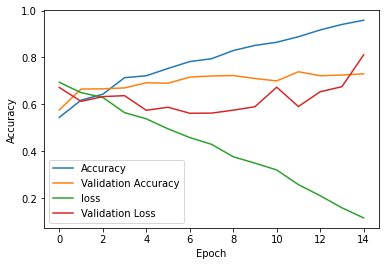

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.title("Accuracy del modelo")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Evaluacion del modelo:

In [ ]:
from tensorflow.keras.preprocessing import image
# bajar una imagen de ejemplo de internet
img = image.load_img("ejemplo.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')